# Using Pandas pipe function to improve code readability

This is a notebook for the medium article [Using Pandas pipe function to improve code readability](https://medium.com/@bindiatwork/using-pandas-pipe-function-to-improve-code-readability-96d66abfaf8)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def load_data():
    return pd.read_csv('data/train.csv')

df = load_data()
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

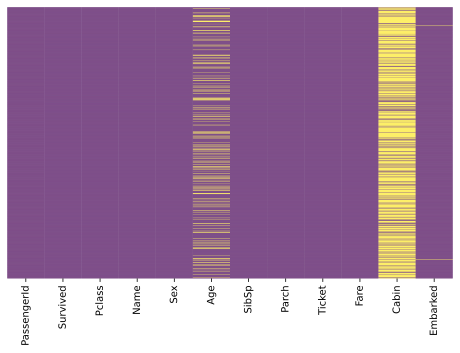

In [2]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

## 1. Split Name into first name and second name

In [3]:
def split_name(x_df):
    def split_name_series(string):
        firstName, secondName=string.split(', ')
        return pd.Series(
            (firstName, secondName),
            index='firstName secondName'.split()
        )
    # Select the Name column and apply a function
    res=x_df['Name'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

In [4]:
res=(
    load_data()
    .pipe(split_name)
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstName  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                   secondName  
0                             Mr. Owen Harris  
1  Mrs. John Bradley (Florence Briggs Thayer)  
2                                 Miss. Laina  
3          Mrs. Jacques Heath (Lily May Peel)  
4                           Mr. William Henry

## 2. For Sex, substitute value male with M and female with F

In [5]:
def substitute_sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex']=df['Sex'].map(mapping)
    return x_df

In [6]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   M  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   F  38.0      1      0   
2                             Heikkinen, Miss. Laina   F  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   F  35.0      1      0   
4                           Allen, Mr. William Henry   M  35.0      0      0   

             Ticket     Fare Cabin Embarked  firstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                   secondName  
0                             Mr. Owen Harris  
1  Mrs. John Bradley (Florence Briggs Thayer)  
2                                 Miss. Laina  
3          Mrs. Jacques Heath (Lily May Peel)  
4                           Mr. William Henry

## 3. Replace the missing Age with some form of imputation

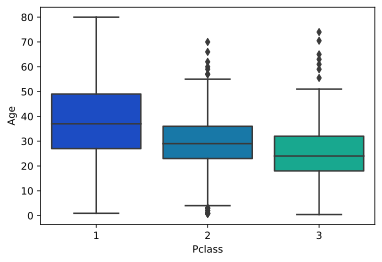

In [7]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

In [8]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}

def replace_age_na(x_df,fill_map):
    cond=x_df['Age'].isna()
    res=x_df.loc[cond,'Pclass'].map(fill_map)
    x_df.loc[cond,'Age']=res

    return x_df

In [9]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
)
res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   M  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   F  38.0      1      0   
2                             Heikkinen, Miss. Laina   F  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   F  35.0      1      0   
4                           Allen, Mr. William Henry   M  35.0      0      0   

             Ticket     Fare Cabin Embarked  firstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                   secondName  
0                             Mr. Owen Harris  
1  Mrs. John Bradley (Florence Briggs Thayer)  
2                                 Miss. Laina  
3          Mrs. Jacques Heath (Lily May Peel)  
4                           Mr. William Henry

In [10]:
plt.subplots(figsize=(8,5))
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

## 4. Convert ages to groups of age ranges: ≤12, Teen (≤18), Adult (≤60), and Older (>60).

In [11]:
def create_age_group(x_df):
    bins=[0, 13, 19, 61, sys.maxsize]
    labels=['<12', 'Teen', 'Adult', 'Older']
    ageGroup=pd.cut(x_df['Age'],bins=bins,labels=labels)
    x_df['ageGroup']=ageGroup
    return x_df

In [12]:
res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
    .pipe(create_age_group)
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   M  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   F  38.0      1      0   
2                             Heikkinen, Miss. Laina   F  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   F  35.0      1      0   
4                           Allen, Mr. William Henry   M  35.0      0      0   

             Ticket     Fare Cabin Embarked  firstName  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                   secondName ageGroup  
0                             Mr. Owen Harris    Adult  
1  Mrs. John Bradley (Florence Briggs Thayer)    Adult  
2                                 Miss. Laina    Adult  
3          Mrs. Jacques Heath (Lily May Peel)    Adult  
4                           Mr. William Henry    Adult